# Reconnaissance d'images

In [1]:
# Modeling
from mxnet import image
from gluoncv import model_zoo, data, utils
 
# Visualization
import os
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

In [2]:
'''Display the different models : SSD , Faster-RCNN , ...'''
# for model in model_zoo.get_model_list():
    # print(model)

'Display the different models : SSD , Faster-RCNN , ...'

In [3]:
'''Pour la démo , un modèle pré-entrainé 
yolo3_darknet53_coco : traite plus de 100 images par seconde 
et une précision moyenne supérieure (mAP = mean Average Precision)à 33.
'''
selected_model = 'yolo3_darknet53_coco'
# Define network
network = model_zoo.get_model(selected_model, pretrained=True)

100%|██████████| 224190/224190 [00:21<00:00, 10666.50KB/s]


In [4]:
def load_image(filepath):
    """
    Charge une image.
 
    @parameter
        filepath: chemin de fichier de notre image RGB de format JPG.
            Il est de type string (str)
     
    @return
        imageHWC: un tableau de type mx.nd.NDArray avec des intensités de pixel 
            de la forme HWC (H: Height ; W: Width ; C: Channel)
    """
 
    imageHWC = image.imread(filepath)
 
    return imageHWC

In [54]:
# Load image
imageHWC = load_image("./Datas_in/dolphin.jpeg")
#imageHWC

In [8]:
def transform_image(array):
    """
    Transforme une image en :
 
    1) Redéfinissant la taille de l'image à la plus petite dimension qui est 416.
        Exemple : (832, 3328) -> (416, 1664).
    2) Recadrant à un carré central de dimension (416, 416).
    3) Convertissant l'image de la forme HWC à CHW.
    4) Normalisant l'image en utilisant des statistiques de COCO (normalisation 
        par moyenne et variance du canal couleur).
    5) Créant un batch d'une seule image.
 
    @parameter
        array: mx.nd.NDArray dans la forme HWC
     
    @return
        Un tuple de (mx.nd.NDArray, numpy.ndarray).
            Ce tuple est un batch d'une image transformée (dans la forme NCHW) 
                et une image non-normalisée.
    """
 
    return data.transforms.presets.yolo.transform_test(imgs=array)

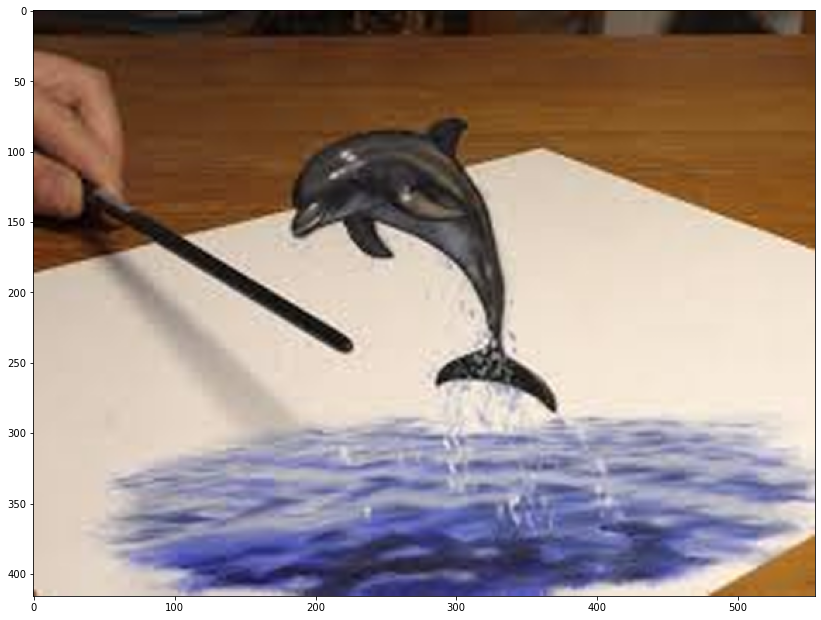

In [55]:
''' La normalisation c'est quoi Jamy ? '''
# Transform imageHCW
norm_image, unnorm_image = transform_image(imageHWC)
 
# Plot un-normalized image
plt.imshow(unnorm_image)
fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.show()

In [10]:
def detect(network, array):
    """
    Renvoie les boîtes de délimitation et les prédictions de classe d'un réseau 
        et d'une image donnés.
 
    @parameters
        network: modèle pré-entraîné de détection d'objets.
            Il est de type mx.gluon.Block
        array : un batch d'images transformées de taille NCHW(1, 3, 416, 416).
            Il est de type mx.nd.NDArray
 
    @return
        Un tuple de ID de classes, des scores et des boîtes de délimitation 
            des prédictions.
            Ce tuple  est de type mx.nd.NDArrays
    """
 
    predictions = network(array)
 
    class_ids, scores, bounding_boxes = predictions
 
    return class_ids, scores, bounding_boxes

Nom de fichier en sortie ? : doplhin_test


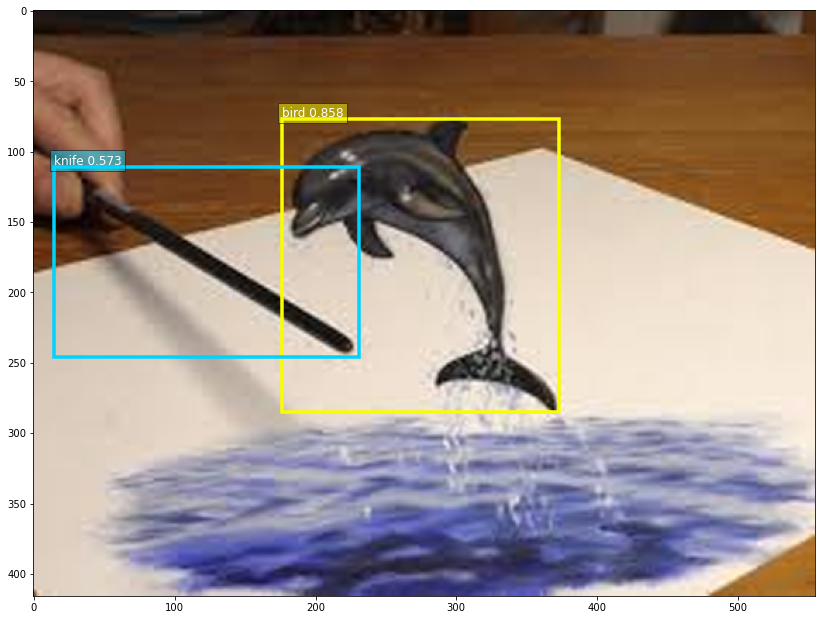

In [56]:
# Choose the name of the output image
file_name = str(input("Nom de fichier en sortie ? : "))
# Predict object detection
class_ids, scores, bounding_boxes = detect(network=network, array=norm_image)
 
# Plot object detection
ax = utils.viz.plot_bbox(unnorm_image, 
                         bounding_boxes[0], 
                         scores[0], 
                         class_ids[0], 
                         class_names=network.classes)
fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.savefig(f'./Datas_out/{file_name}')
plt.show()